PROJECT 2

Ketevani Bibichadze

09/11/2025

I completed this work independently

**TASK 1**

In [4]:
import pandas as pd
import numpy as np

print(" Libraries loaded successfully !")

 Libraries loaded successfully !


Load the three datasets

In [5]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

print("Data loaded successfully!")


Data loaded successfully!


1. Number of Rows and Columns

In [8]:
print("Customers:", customers.shape)
print("Products:", products.shape)
print("Transactions:", transactions.shape)



Customers: (205, 6)
Products: (50, 5)
Transactions: (508, 6)


2. Column Names

In [13]:
print("Columns of Customers dataset:", list(customers))
print("Columns of Products dataset:", list(products))
print("Columns of Transactions dataset:", list(transactions))


Columns of Customers dataset: ['customer_id', 'name', 'email', 'registration_date', 'country', 'age']
Columns of Products dataset: ['product_id', 'product_name', 'category', 'price', 'stock']
Columns of Transactions dataset: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'transaction_date', 'payment_method']


3. First five rows of each dataset

In [23]:
print("\nCustomers first five rows:")
customers.head()


Customers first five rows:


,customer_id,name,email,registration_date,country,age
0,C001,Logan Brown,NaN,2024-01-01,Canada,39
1,C002,John Rodriguez,emma.johnson1@email.com,2024-01-02,France,28
2,C003,Ava Davis,NaN,2024-01-04,Australia,65
3,C004,William Brown,NaN,2024-01-06,Italy,33
4,C005,Abigail Moore,william.jones4@email.com,2024-01-08,Canada,50


In [24]:
print("\nProducts first five rows:")
products.head()


Products first five rows:


,product_id,product_name,category,price,stock
0,P001,Speaker,Electronics,353.96,15
1,P002,Science Book,Books,34.88,11246
2,P003,Sweater,Clothing,23.53,97
3,P004,Smartphone,Electronics,56.05,86
4,P005,Running Shoes,sports,-339.29,50


In [25]:
print("\nTransactions first five rows:")
transactions.head()


Transactions first five rows:


,transaction_id,customer_id,product_id,quantity,transaction_date,payment_method
0,T001,C178,P002,1.0,2024-01-01,Credit Card
1,T002,C163,P015,5.0,2024-01-01,PayPal
2,T003,C124,P011,1.0,2024-01-02,Credit Card
3,T004,C033,P008,2.0,2024-01-03,Bank Transfer
4,T005,C161,P026,1.0,2024-01-03,Credit Card


**PART B: EXPLORE CUSTOMER DATA**

How many customers do we have?

In [26]:
print("Number of customers:", len(customers))


Number of customers: 205


 What countries are our customers from? How many from each country?

In [30]:
print("\nCustomer counts by country:")
print(customers['country'].value_counts())



Customer counts by country:
country
Canada            27
Australia         23
Germany           21
Italy             20
Japan             20
France            19
Netherlands       19
United Kingdom    17
Spain             15
United States     10
US                 8
USA                6
Name: count, dtype: int64


What is the age range of our customers (min, max, average)?

In [40]:
customers["age_cleaned"] = customers["age"].str.extract(r"(\d+)").astype(int)    #extracting numbers from the rows, and converting into integers

# count min,max,average
print("Customers minimum age:",customers['age_cleaned'].min())
print("Customers maximum age:",customers['age_cleaned'].max())
print("Customers average age:",customers['age_cleaned'].mean())

Customers minimum age: 18
Customers maximum age: 75
Customers average age: 47.014634146341464


How many customer records have missing email addresses?


In [41]:
print(customers['email'].isnull().sum())

20


Are there any duplicate customer records?

In [49]:
print("Duplicated customer records:", customers.duplicated().sum())

Duplicated customer records: 4


**PART C**

How many products do we sell?

In [51]:
print("Number of products:",products.shape[0])

Number of products: 50


What product categories do we have?

In [54]:
print("Product categories:", products['category'].unique())

Product categories: ['Electronics' 'Books' 'Clothing' 'sports' 'Sports' 'Home' 'books' 'home'
 'electronics']


How many products in each category?

In [55]:
print("Number of products in each category:")
print(products['category'].value_counts())

Number of products in each category:
category
Books          13
Electronics    10
Clothing        9
Home            8
books           3
sports          2
Sports          2
home            2
electronics     1
Name: count, dtype: int64


 What is the price range (cheapest to most expensive)?

In [57]:
print("Cheapest product price:", products['price'].min())
print("Most expensive product price:", products['price'].max())

Cheapest product price: -488.17
Most expensive product price: 491.1


Which products are out of stock (stock = 0)?

In [70]:
print("Products out of stock:")
print(products['product_name'][products['stock'] == 0])


Products out of stock:
23           Camera
24    Fiction Novel
27     Fantasy Book
Name: product_name, dtype: object


Are there any data quality issues you notice?



In [71]:
# for this, lets check if we have any missing price
print("Missing prices:", products['price'].isnull().sum())
# check if there's any duplicated rows
print("Duplicated rows:", products.duplicated().sum())

Missing prices: 3
Duplicated rows: 0


_as we can see, data quality issue here is that we have NAs in prices_

**PART D**

How many transactions occurred?
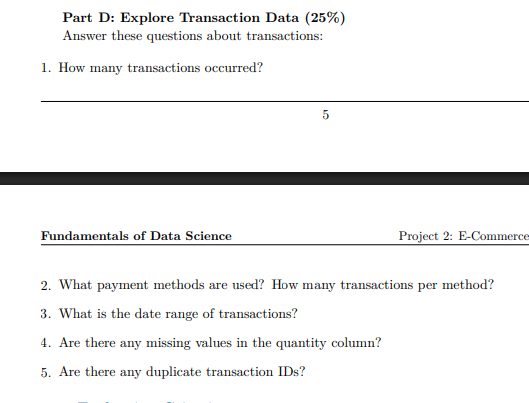

In [74]:
print("Number of transactions:", transactions.shape[0])


Number of transactions: 508


What payment methods are used? How many transactions per method?

In [78]:
#standardizing the column to all lowercase, because we have the same payment methods with some written lowercase and some uppercase

transactions['payment_method'] = transactions['payment_method'].str.lower()

print("\nPayment methods used:",transactions['payment_method'].unique())
print("\nTransactions with each payment method:")
print(transactions['payment_method'].value_counts())



Payment methods used: ['credit card' 'paypal' 'bank transfer']

Transactions with each payment method:
payment_method
paypal           179
credit card      175
bank transfer    154
Name: count, dtype: int64


What is the date range of transactions?

In [80]:
print("Earliest transaction date:", transactions['transaction_date'].min())
print("Latest transaction date:", transactions['transaction_date'].max())

Earliest transaction date: 2024-01-01
Latest transaction date: 2025-12-31


Are there any missing values in the quantity column?


In [83]:
print("Missing values in column 'quantity':",transactions['quantity'].isnull().sum())


Missing values in quantity: 16


 Are there any duplicate transaction IDs?


In [85]:
print("Duplicate transaction IDs:", transactions.duplicated().sum())

Duplicate transaction IDs: 7


 **Task 2: Data Cleaning**

In [168]:
#Let's store the original row counts before cleaning data
customer_count_orig = customers.shape[0]
product_count_orig = products.shape[0]
transaction_count_orig = transactions.shape[0]

**Part A: Clean Customer Data**

1. Handle missing emails


Count how many customers have missing emails

In [87]:
missing_emails=customers['email'].isna().sum()
print(missing_emails)

20


Remove customers with missing emails (business rule: email required)

In [89]:
customers_cleaned = customers.dropna(subset=['email'])

Report how many customers were removed

In [154]:
# this is the same as the number of missing emails
print("Number of removed customers:", missing_emails)

Number of removed customers: 20


2. Remove duplicate customers

Identify duplicate customer records


In [103]:
duplicate_count = customers_cleaned.duplicated().sum()
print("Duplicate customer records:", duplicate_count)

customer_id          0
name                 0
email                0
registration_date    0
country              0
age                  0
age_cleaned          0
dtype: object


Keep the first occurrence, remove others


In [93]:
customers_cleaned = customers_cleaned.drop_duplicates()

Report how many duplicates were found

In [149]:
print("Number of duplicates found:", duplicate_count)

Number of duplicates found: 4


3. Standardize country names

In [109]:
# standardizing all US values to 'United States' and counting how many were changed

# Count how many values need to be changed
change_count = (customers_cleaned['country'].isin(['US', 'USA'])).sum()

# Replace US and USA with United States
customers_cleaned['country'] = customers_cleaned['country'].replace(
    ['US', 'USA'], 'United States'
)

# How many were changed
print("Number of names standardized:", change_count)


Number of country names standardized: 0


4.Verify the cleaned data

In [112]:
# Confirm no missing emails remain
print("Missing emails:", customers_cleaned['email'].isnull().sum())
# Confirm no duplicates remain
print("Duplicate customers:", customers_cleaned.duplicated().sum())
# Show final customer count
print("Final customer count:", customers_cleaned.shape[0])


Missing emails: 0
Duplicate customers: 0
Final customer count: 181


**Part B: Clean Product Data**

 1. Handle missing prices

Identify products with missing prices

In [157]:
print(products[products['price'].isnull()])
print()
print("Number of products with missing prices:")
print(products[products['price'].isnull()].sum())

Empty DataFrame
Columns: [product_id, product_name, category, price, stock]
Index: []

Number of products with missing prices:
product_id        0
product_name      0
category          0
price           0.0
stock             0
dtype: object


Fill missing prices with the median price of the same category

In [116]:
# calculating median price of each category
category_median = products.groupby('category')['price'].median()

# fill missing prices with median of the category
products['price'] = products['price'].fillna(
    products.groupby('category')['price'].transform('median')
)

print(products['price'])


0     353.96
1      34.88
2      23.53
3      56.05
4    -339.29
5     116.11
6     491.10
7     299.51
8     132.62
9     265.90
10    273.17
11    265.90
12    143.06
13    234.06
14     35.32
15    274.91
16     77.79
17   -488.17
18     30.12
19    222.43
20     48.44
21    100.32
22    419.63
23    347.36
24     94.91
25    226.75
26    279.12
27     99.60
28    477.88
29   -281.63
30    367.72
31    131.39
32     87.74
33     17.05
34     54.98
35     29.96
36     56.05
37     18.41
38    250.89
39    179.69
40    328.39
41    475.08
42     32.20
43     17.50
44    256.54
45    274.29
46    311.77
47    324.79
48    297.03
49    402.47
Name: price, dtype: float64


 Explain why you used median instead of mean

_Answer: we use median because median provides a more accurate typical price than mean. Mean reflects extreme values(outliers) and in case there are outliers in the price column, mean wouldn't really reflect typical price_

 2. Fix negative prices

   Find products with negative prices (data entry errors)

In [130]:
negative = products[products['price'] < 0]
negative_prices = (products['price'] < 0).sum()
print("Products with negative prices:")
print(negative)


Products with negative prices:
   product_id   product_name     category   price  stock
4        P005  Running Shoes       sports -339.29     50
17       P018     Smartphone  Electronics -488.17     29
29       P030          Dress     Clothing -281.63     21


Convert negative prices to positive (remove minus sign)

In [ ]:
products['price'] = products['price'].abs()

Report how many were fixed

In [129]:
print("Number of prices fixed:", negative_prices)

Number of prices fixed: 3


  3. Clean product names

Remove extra spaces from product names


In [131]:
products['product_name'] = products['product_name'].str.strip()

4. Verify the cleaned data

In [136]:
#  Confirm no missing prices
print("Missing prices:", products['price'].isnull().sum())
#   Confirm no negative prices
print("Negative prices:", (products['price'] < 0).sum())
#    Show sample of cleaned products
print()
print("Sample of cleaned products:")
print(products.head())

Missing prices: 0
Negative prices: 3

Sample of cleaned products:
  product_id   product_name     category   price  stock
0       P001        Speaker  Electronics  353.96     15
1       P002   Science Book        Books   34.88  11246
2       P003        Sweater     Clothing   23.53     97
3       P004     Smartphone  Electronics   56.05     86
4       P005  Running Shoes       sports -339.29     50


  **Part C: Clean Transaction Data**

 1. Handle missing quantities

 Identify transactions with missing quantity


In [158]:
missing_quantity= transactions['quantity'].isnull().sum()
print("Transactions with missing quantity:", missing_quantity)


Transactions with missing quantity: 0


Fill with 1 (most common single-item purchase)

In [138]:
transactions['quantity'] = transactions['quantity'].fillna(1)

 Report how many were filled

In [148]:
print(missing_quantity)

0


2. Remove duplicate transactions

Identify duplicate transaction IDs

In [152]:
duplicate_count = transactions.duplicated(subset='transaction_id').sum()
print("Duplicate transaction IDs:",duplicate_count)

8


Remove duplicates, keep first occurence

In [172]:
transactions_cleaned = transactions.drop_duplicates(subset='transaction_id')


Report how many duplicates were dropped

In [153]:
print("\nNumber of duplicate transactions dropped:", duplicate_count)


Number of duplicate transactions dropped: 8


   3. Create a cleaning summary

In [174]:
print("--- CLEANING SUMMARY ---")

# Customers cleaning summary
print("\nCustomers Dataset:")
print("Rows before cleaning:", customer_count_orig)
print("Rows after cleaning:", customers_cleaned.shape[0])
print("Removed/Fixed:", customer_count_orig - customers_cleaned.shape[0])

# Products summary
print("\nProducts Dataset:")
print("Rows before cleaning:", product_count_orig)
print("Rows after cleaning:", products.shape[0])
print("Removed/Fixed:", product_count_orig - products.shape[0])

# Transactions summary
print("\nTransactions Dataset:")
print("Rows before cleaning:", transaction_count_orig)
print("Rows after cleaning:", transactions_cleaned.shape[0])
print("Removed/Fixed:", transaction_count_orig- transactions_cleaned.shape[0])




--- CLEANING SUMMARY ---

Customers Dataset:
Rows before cleaning: 205
Rows after cleaning: 181
Removed/Fixed: 24

Products Dataset:
Rows before cleaning: 50
Rows after cleaning: 50
Removed/Fixed: 0

Transactions Dataset:
Rows before cleaning: 508
Rows after cleaning: 500
Removed/Fixed: 8


**Task 3: Business Analysis & Reporting**

Part A: Merge the Datasets

In [191]:
# merge transactions and customers
merged_1 = pd.merge(
    transactions_cleaned,
    customers_cleaned,
    on='customer_id'
)
# merge this with products
merged = pd.merge(
    merged_1,
    products,
    on='product_id'
)

# finalizing the dataset to include the required columns
sales_data = merged[[
    'transaction_id','customer_id','transaction_date', 'quantity', 'payment_method', 'name', 'country', 'age_cleaned',
    'product_name', 'category', 'price'
]]

sales_data = sales_data.copy()

 Part B: Calculate Business Metrics

Create total_amount column: price × quantity

In [200]:
sales_data['total_amount'] = sales_data['price'] * sales_data['quantity']

month, day of week columns

In [193]:
sales_data['transaction_date'] = pd.to_datetime(sales_data['transaction_date'])

#add month and day of week columns
sales_data['month'] = sales_data['transaction_date'].dt.month
sales_data['day_of_week'] = sales_data['transaction_date'].dt.day_name()

Customer category column

In [204]:
 #how much each customer spent
customer_total = sales_data.groupby('customer_id')['total_amount'].sum().rename('total_spent')

sales_data=sales_data.merge(customer_total,on='customer_id')

def customer_category(total):
    if total > 1000:
        return "High Spender"
    elif total >= 500:
        return "Medium Spender"
    else:
        return "Low Spender"

sales_data['customer_category'] = sales_data['total_spent'].apply(customer_category)

print(sales_data)


    transaction_id customer_id transaction_date  quantity payment_method  \
0             T001        C178       2024-01-01       1.0    credit card   
1             T003        C124       2024-01-02       1.0    credit card   
2             T005        C161       2024-01-03       1.0    credit card   
3             T006        C189       2024-01-04       4.0  bank transfer   
4             T007        C179       2024-01-05       3.0    credit card   
..             ...         ...              ...       ...            ...   
439           T495        C079       2024-12-27       1.0  bank transfer   
440           T497        C118       2024-12-28       4.0    credit card   
441           T498        C113       2024-12-29       3.0  bank transfer   
442           T499        C094       2024-12-30       4.0    credit card   
443           T500        C179       2024-12-31       1.0         paypal   

                name         country  age_cleaned       product_name  \
0     Michael W

**Part C: Generate Business Reports**

1. Revenue Analysis

   What is total revenue across all transactions?

In [206]:
print(sales_data['total_amount'].sum())

197920.07
197920.07


What is revenue by product category? (show top 3)

In [211]:
#sort in ascending order and print top 3

revenue_by_category = sales_data.groupby('category')['total_amount'].sum().sort_values(ascending = False)

print(revenue_by_category.head(3))


category
Books       65606.52
Home        41332.35
Clothing    32099.79
Name: total_amount, dtype: float64


Which month had the highest revenue?

In [218]:
# first lets calculate revenues by each month
revenue_by_month = sales_data.groupby('month')['total_amount'].sum()

print(revenue_by_month)

# Month with highest revenue
print("Month with highest revenue:", revenue_by_month.index[revenue_by_month == revenue_by_month.max()][0]
)


month
1     15835.33
2     12999.22
3     11206.02
4     13820.80
5     19369.59
6     19720.48
7     23736.47
8     20672.85
9     10658.64
10    20343.26
11    14254.42
12    15302.99
Name: total_amount, dtype: float64
Month with highest revenue: 7


What is the average transaction value

In [219]:
print("Average transaction value:", sales_data['total_amount'].mean())

Average transaction value: 445.76592342342343


2. Customer Insights

Who are the top 5 customers by spending?

In [224]:
 # group by customers, sort, and then store top 5 using head()
top_5_customers = sales_data.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head()

print("Top 5 customers :", top_5_customers)


Top 5 customers : customer_id
C113    5498.89
C074    5228.55
C047    5165.83
C075    5053.82
C145    4729.86
Name: total_amount, dtype: float64


What is the average spending per customer?

In [233]:
average_spending = sales_data.groupby('customer_id')['total_amount'].sum().mean()
print( average_spending)


1199.5155757575758


Which country generates the most revenue?

In [227]:
#revenue by each country
revenue_by_country = sales_data.groupby('country')['total_amount'].sum()

#country with max revenue
country_with_max_revenue = revenue_by_country[revenue_by_country == revenue_by_country.max()].index[0]
print(country_with_max_revenue)

canada


How many customers in each segment (High/Medium/Low)?

In [232]:
segment_counts = sales_data['customer_category'].value_counts()
print("customers in each segment: ")
print( segment_counts)

customers in each segment: 
customer_category
High Spender      274
Low Spender       109
Medium Spender     61
Name: count, dtype: int64


 3. Product Performance

  What are the top 5 products by revenue?

In [236]:
top_5_products_revenue = sales_data.groupby('product_name')['total_amount'].sum().sort_values(ascending=False).head()

print("Top 5 products by revenue:", top_5_products_revenue)


Top 5 products by revenue: product_name
Cookbook         29932.07
Fiction Novel    26906.29
Speaker          13804.44
Picture Frame    11965.50
Fantasy Book     11092.16
Name: total_amount, dtype: float64


What are the top 5 products by quantity sold?


In [240]:
top_5_products_quantity = sales_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head()

print("Top 5 products by quantity:", top_5_products_quantity)

Top 5 products by quantity: product_name
Cookbook         135.0
Fiction Novel     97.0
Smartphone        74.0
Biography         72.0
Fantasy Book      68.0
Name: quantity, dtype: float64


   Which product category is most popular?


In [241]:
category_popularity = sales_data.groupby('category')['quantity'].sum().sort_values(ascending=False)
print(category_popularity.index[0])

Books


What is the average revenue per product category?

In [239]:
print(sales_data.groupby('category')['total_amount'].mean())

category
Books           497.019091
Clothing        445.830417
Electronics     291.517527
Home            582.145775
Sports          810.557143
books           681.591923
electronics    1299.160000
home            457.468667
sports         -355.750526
Name: total_amount, dtype: float64


   4. Business Recommendations

  Based on your analysis, write 3-4 sentences recommending:



Which product category to focus on for growth

_Answer: For growth, the company should prioritize the product category that generates the most revenue in order to maintain strong demand and overall consistent sales. This category is Books category. The company can invest in expanding book selection, offering bundle book deals, etc. to further strengthen this growth_

Which customer segment to target for marketing

_Answer: High Spenders segment should be targeted because they generate the largest share of revenue and are more likely to respond to company marketing efforts as well. The company can also target medium spenders and the  marketing should encourage to increase spending by promotions, discounts, etc._

Any other insights for improving sales

_Answer: To improve overall sales, the company should focus on increasing customer repeat purchases. For this, the company can introduce loyalty rewards, seasonal promotions,email reminders, etc. Improving product recommendations based on customer purchase history could be helpful._